In [1]:
import sys
sys.path.append("../../")
sys.path.append("../../deepYeast/")
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
import os
from deepYeast.analyser.utils import file_traverse
from deepYeast.share.wl.utils import convert_cvat_to_trainingset
from deepYeast.share.wl.upload_mask_to_cvat import mask2xml
%load_ext autoreload
%autoreload 2

In [2]:
cvat_download_root = "/home/wlli/Downloads/job_38/"
train_set_save_root = "/home/wlli/Downloads/job_38/tf"

In [3]:
convert_cvat_to_trainingset(cvat_download_root, train_set_save_root
                       ,series_name="set1_140")

FileNotFoundError: [Errno 2] No such file or directory: '/home/wlli/Downloads/job_38/gtFine'

In [4]:
a = file_traverse(os.path.join('/home/wlli/Downloads/job_38_mask/gtFine/default/mask/'),  file_regular=r'.*[(.png) | (.tif)]$')

In [5]:
a

['/home/wlli/Downloads/job_38_mask/gtFine/default/mask/473_REF_TL_01_gtFine_instanceIds.png',
 '/home/wlli/Downloads/job_38_mask/gtFine/default/mask/473_REF_TL_02_gtFine_instanceIds.png',
 '/home/wlli/Downloads/job_38_mask/gtFine/default/mask/473_REF_TL_03_gtFine_instanceIds.png']

In [6]:
mask2xml( a, "/home/wlli/Downloads/job_38/test.xml")

/home/wlli/miniconda3/envs/deepyeast/lib/python3.9/site-packages/imageio/plugins/pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(


1001
1002
1003
1004
1005
1015
1027
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
2006
2007
2008
2009
2010
2011
2012
2013
2014
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2028
2029
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1041
1042
1051
1052
1053
1054
1055
1056
1057
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2043
2044
2045
2046
2047
2048
2049
2050
1001
1002
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
2003
2004
2005
2006
2007
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
5058


In [3]:
from skimage.io import imread
from deepYeast.share.wl.meaure import ImageMeasure

In [7]:
mask =  imread("/home/wlli/Downloads/project_deepyeat trainingset_dataset_2024_06_20_13_53_04_cityscapes 1.0/tf/instance_maps/train/set1_140/100x_bin1x1_2040x2040_DV_WT_01.png")

/home/wlli/miniconda3/envs/deepyeast/lib/python3.9/site-packages/imageio/plugins/pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(


In [11]:
mf = ImageMeasure(mask)

In [ ]:
mf

In [18]:
import xml.etree.ElementTree as ET

In [87]:
tree = ET.parse("/home/wlli/Downloads/job_38/annotations.xml")
root = tree.getroot()

In [88]:
root

<Element 'annotations' at 0x77a3c2373ae0>

In [89]:
image

<Element 'image' at 0x77a3c25be3b0>

In [94]:
for image in root:
    if image.tag == "image":
        print(image.tag, image.attrib)
        name = image.get("name")
        width = int(image.get("width"))
        height = int(image.get("height"))
        mask = np.zeros((width, height), dtype=np.uint16)
        order = 0
        for polygen in image:
            order += 1
            label = int(polygen.get("label"))
            points = polygen.get("points")
            point_list = np.array([point.split(",") for point in points.split(";")], dtype=np.float_)
            fill_row_coords, fill_col_coords = draw.polygon(point_list[:, 1], point_list[:, 0], mask.shape)
            mask[fill_row_coords, fill_col_coords] = label*1000+order
        

image {'id': '0', 'name': 'images/473_REF_TL_01.png', 'width': '512', 'height': '512'}
image {'id': '1', 'name': 'images/473_REF_TL_02.png', 'width': '512', 'height': '512'}
image {'id': '2', 'name': 'images/473_REF_TL_03.png', 'width': '512', 'height': '512'}
image {'id': '3', 'name': 'images/473_REF_TL_04.png', 'width': '512', 'height': '512'}
image {'id': '4', 'name': 'images/473_REF_TL_05.png', 'width': '512', 'height': '512'}
image {'id': '5', 'name': 'images/473_REF_TL_06.png', 'width': '512', 'height': '512'}
image {'id': '6', 'name': 'images/473_REF_TL_07.png', 'width': '512', 'height': '512'}
image {'id': '7', 'name': 'images/473_REF_TL_08.png', 'width': '512', 'height': '512'}
image {'id': '8', 'name': 'images/473_REF_TL_09.png', 'width': '512', 'height': '512'}
image {'id': '9', 'name': 'images/473_REF_TL_10.png', 'width': '512', 'height': '512'}


In [97]:
imsave("test.png", mask)

/tmp/ipykernel_3498985/3881339776.py:1: UserWarning: test.png is a low contrast image
  imsave("test.png", mask)


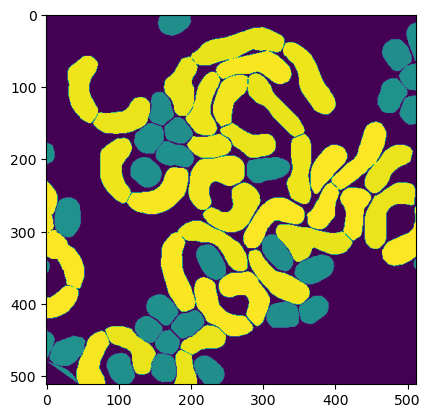

In [154]:
plt.imshow(mask)

In [74]:
polygen.attrib

{'label': '1',
 'source': 'manual',
 'occluded': '0',
 'points': '1567.50,2029.76;1567.50,2026.92;1567.50,2024.07;1567.50,2021.22;1567.81,2018.69;1568.74,2016.76;1569.66,2014.84;1570.58,2012.92;1571.51,2010.99;1572.50,2009.14;1573.50,2007.29;1574.50,2005.44;1575.70,2003.80;1577.13,2002.37;1578.55,2000.95;1579.97,1999.53;1581.40,1998.10;1583.64,1997.50;1585.49,1996.50;1588.17,1996.33;1590.19,1995.50;1592.03,1994.50;1594.88,1994.50;1597.73,1994.50;1600.58,1994.50;1603.42,1994.50;1605.64,1995.14;1608.12,1995.50;1610.97,1995.50;1613.81,1995.50;1615.66,1996.50;1617.75,1997.25;1619.68,1998.18;1622.10,1998.60;1624.05,1999.50;1625.95,2000.45;1627.75,2001.50;1629.30,2002.80;1630.72,2004.22;1632.64,2005.14;1634.07,2006.57;1634.99,2008.49;1635.92,2010.42;1636.84,2012.34;1637.50,2014.53;1637.50,2017.37;1637.50,2020.22;1637.50,2023.07;1637.50,2025.92;1636.50,2030.61;1636.50,2033.46;1635.50,2035.31;1634.92,2037.58;1633.10,2040.00;1573.10,2040.00;1571.26,2037.32;1567.46,2029.72',
 'z_order': '0'}

In [151]:
from skimage import draw
import numpy as np
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=np.bool_)
    mask[fill_row_coords, fill_col_coords] = True
    return mask

In [152]:
data = poly2mask(point_list[:, 1], point_list[:, 0], mask.shape)

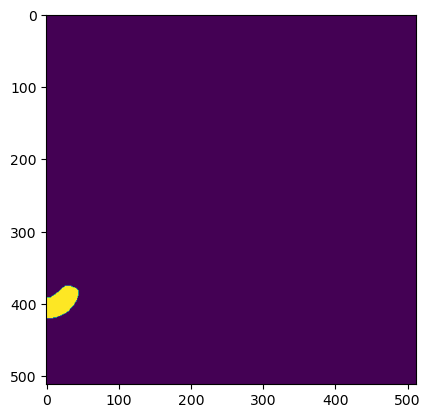

In [153]:
plt.imshow(data)

In [98]:
def save_to_image(mask_dict, save_path):
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    for key, value in mask_dict.items():
        imsave(os.path.join(save_path, key), value)

In [141]:
from share.wl.xml_to_mask import dump_xml_to_mask
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
dump_xml_to_mask("/home/wlli/Downloads/job_38/annotations.xml", "./test/")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 22.34it/s]


In [117]:
for k, v in mask_dict.items():
    print(k)

images/473_REF_TL_01.png
images/473_REF_TL_02.png
images/473_REF_TL_03.png
images/473_REF_TL_04.png
images/473_REF_TL_05.png
images/473_REF_TL_06.png
images/473_REF_TL_07.png
images/473_REF_TL_08.png
images/473_REF_TL_09.png
images/473_REF_TL_10.png


In [128]:
imsave("./test.png", v, dtype=np.uint16)

/tmp/ipykernel_3498985/948842650.py:1: UserWarning: ./test.png is a low contrast image
  imsave("./test.png", v, dtype=np.uint16)


In [164]:
path = os.path.join("./test","images/473_REF_TL_01.png")

In [165]:
from skimage.measure import regionprops_table
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
data = regionprops_table(mask, properties=["coords"])

In [167]:
def mask_to_cvat(input_path, out_file):
    mask = imread(file_path[f])
    mf = ImageMeasure(mask)
    mf.instance_properties = mf.init_instance_properties(number=100)
    #  add new image
    element = dom.createElement('image')
    element.setAttribute('id', str(f))
    element.setAttribute('name', os.path.basename(file_path[f]))
    element.setAttribute('width', str(mf.shape[0]))
    element.setAttribute('height', str(mf.shape[1]))
    for i in range(0, mf.instance_properties.shape[0]):
        #  add new polygon
        obj = mf.instance_properties.iloc[i]
        new_polygon = dom.createElement('polygon')
        new_polygon.setAttribute('label', TYPEMAP[obj.semantic])
        new_polygon.setAttribute('occluded', "0")
        new_polygon.setAttribute('source', "manual")
        new_polygon.setAttribute('points', transform_coords_to_str(
            mf.instance_properties.iloc[i].coords))
        new_polygon.setAttribute('z_order', "0")
        attribute = dom.createElement('attribute')
        attribute.setAttribute('name', str(obj.semantic))
        attribute.appendChild(dom.createTextNode(str(obj.semantic)))
        new_polygon.appendChild(attribute)
        element.appendChild(new_polygon)
    root.appendChild(element)

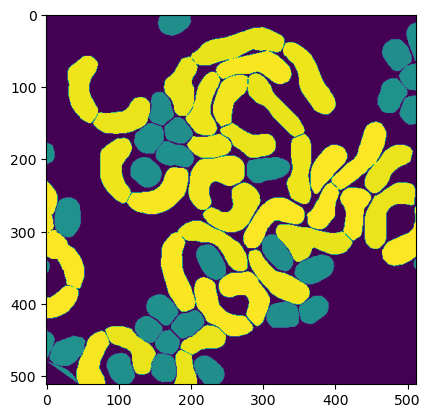

In [168]:
plt.imshow(mask)